In [72]:
import os
import tensorflow as tf

In [73]:
gpus = tf.config.experimental.list_physical_devices ('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth (gpu, True)

In [74]:
import cv2
import imghdr

dataset_path = './dataset'
required_extensions = ['jpg', 'png', 'bmp', 'jpeg']

for class_name in os.listdir (dataset_path):
    if class_name[0] != '.':
        for class_image in os.listdir (os.path.join (dataset_path, class_name)):
            image_path = os.path.join (dataset_path, class_name, class_image)
            try:
                image_load = cv2.imread (image_path) # opening check
                extension = imghdr.what (image_path)
                if extension not in required_extensions:
                    print (f'{class_image} is not in required exts.')
                    os.remove (image_path)
            except Exception:
                print (f'{class_image} is faulty')

In [75]:
from matplotlib import pyplot as plt

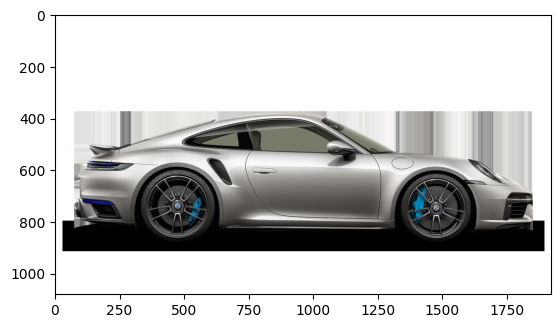

In [76]:
plt.imshow (cv2.imread (os.path.join ('dataset', 'porsche', 'porsche-model.png')));

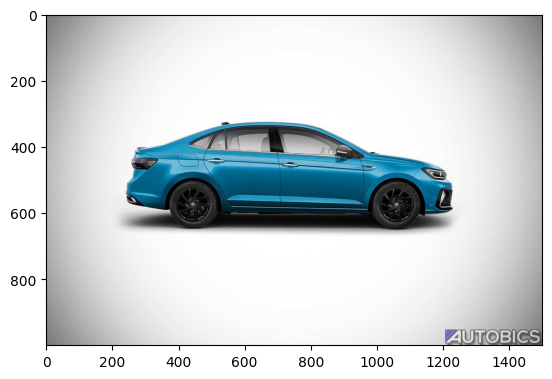

In [77]:
plt.imshow (cv2.imread (os.path.join ('dataset', 'virtusgt', '2022-VW-Virtus-Curcuma-Yellow.jpg')));

In [78]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [88]:
dataset = tf.keras.utils.image_dataset_from_directory ('dataset')

Found 342 files belonging to 2 classes.


In [89]:
dataset = dataset.map (lambda x, y: (x / 255, y))

In [90]:
batch = dataset.as_numpy_iterator ().next ()

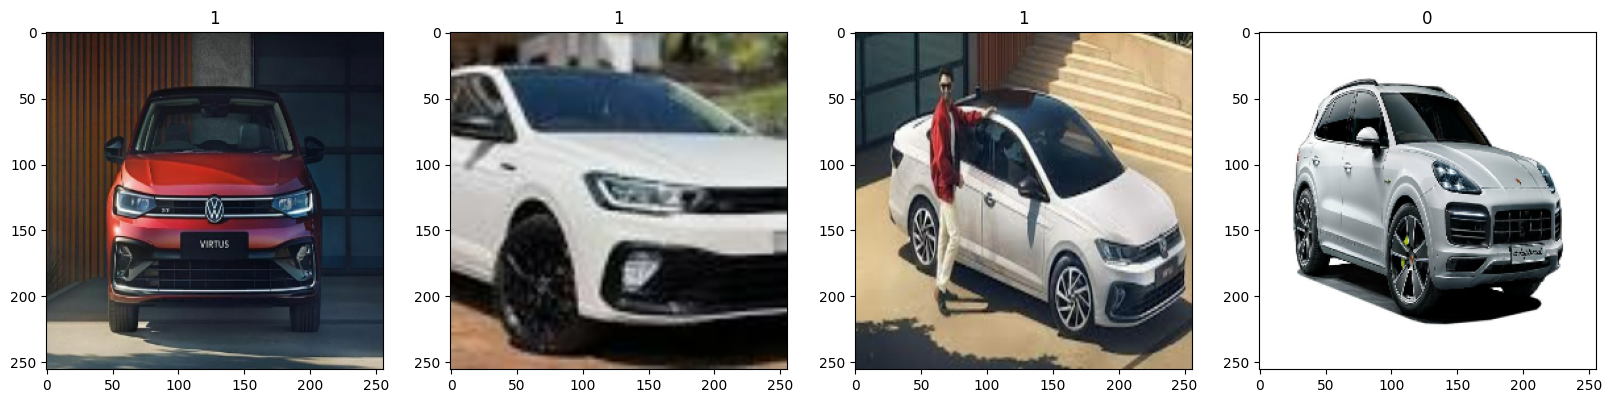

In [91]:
fig, ax = plt.subplots (ncols=4, figsize=(20, 20))
for idx, image in enumerate (batch[0][:4]):
    ax[idx].imshow (image)
    ax[idx].title.set_text (batch[1][idx])

In [92]:
batch[0].min (), batch[0].max ()

(0.0, 1.0)

In [93]:
len (dataset)

11

In [94]:
train_size = int (len (dataset) * 0.7)
val_size = int (len (dataset) * 0.2) + 1
test_size = int (len (dataset) * 0.1)

In [95]:
train_data

<_TakeDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>

In [96]:
train_data = dataset.take (train_size)
val_data = dataset.skip (train_size).take (val_size)
test_data = dataset.skip (train_size + val_size).take (test_size)

In [116]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential ([
    Conv2D (32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D (),

    Conv2D (32, (3, 3), activation='relu'),
    MaxPooling2D (),

    Conv2D (16, (3, 3), activation='relu'),
    MaxPooling2D (),
    
    Flatten (),

    Dense (256, activation='relu'),
    Dense (1, activation='sigmoid')
])

In [117]:
model.compile ('adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

In [118]:
model.summary ()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 16)       

In [119]:
result = model.fit (train_data,
                    epochs=24,
                    validation_data=val_data)

Epoch 1/24


7/7 [==============================] - 7s 443ms/step - loss: 2.8133 - accuracy: 0.4643 - val_loss: 0.9971 - val_accuracy: 0.4792
Epoch 2/24
7/7 [==============================] - 2s 243ms/step - loss: 0.8336 - accuracy: 0.4866 - val_loss: 0.7087 - val_accuracy: 0.4375
Epoch 3/24
7/7 [==============================] - 2s 253ms/step - loss: 0.7319 - accuracy: 0.5312 - val_loss: 0.7258 - val_accuracy: 0.6146
Epoch 4/24
7/7 [==============================] - 2s 242ms/step - loss: 0.7064 - accuracy: 0.5714 - val_loss: 0.6966 - val_accuracy: 0.4583
Epoch 5/24
7/7 [==============================] - 2s 240ms/step - loss: 0.7728 - accuracy: 0.4688 - val_loss: 1.0672 - val_accuracy: 0.4792
Epoch 6/24
7/7 [==============================] - 2s 241ms/step - loss: 1.3001 - accuracy: 0.5000 - val_loss: 1.6168 - val_accuracy: 0.5521
Epoch 7/24
7/7 [==============================] - 2s 240ms/step - loss: 1.0954 - accuracy: 0.5357 - val_loss: 1.1000 - val_accuracy: 0.5000
Epoch 8/24
7/7 [===============

In [120]:
from keras.models import load_model
model.save (os.path.join ('models', 'porschevirtus.h5'))

/Users/gsnmithra/miniforge3/envs/mlp/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [121]:
porsche_virtus = load_model (os.path.join ('models', 'porschevirtus.h5'))

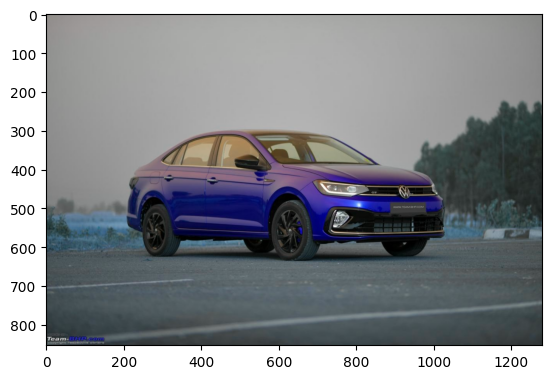

In [138]:
testing_image = cv2.imread ('virtus_test.jpg')
plt.imshow (testing_image)
testing_image = tf.image.resize (testing_image, (256, 256))

In [139]:
import numpy as np
results = porsche_virtus.predict (np.expand_dims (testing_image / 255, 0));

1/1 [==============================] - 0s 30ms/step


In [140]:
if results[0][0] < 0.5:
    print (f'Image of Porsche 👽 at surity of {1 - results[0][0]}')
else:
    print (f'Image of Virtus GT at surity of {results[0][0]}')

Image of Virtus GT at surity of 0.7627712488174438
